In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')


# Part 1: Data Exploration and Preprocessing 

###  Load the Data

In [2]:
df = pd.read_csv(r'C:\Users\urvik\OneDrive\Desktop\ML(Lab)\Lab06-Urvikawa31\clustering-using-scikit-learn-Urvikawa31\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


###  Explore the Dataset

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


###   Data Selection

In [6]:
New_df = df[['Annual Income (k$)','Spending Score (1-100)']]

In [7]:
New_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


###  Initial Visualization

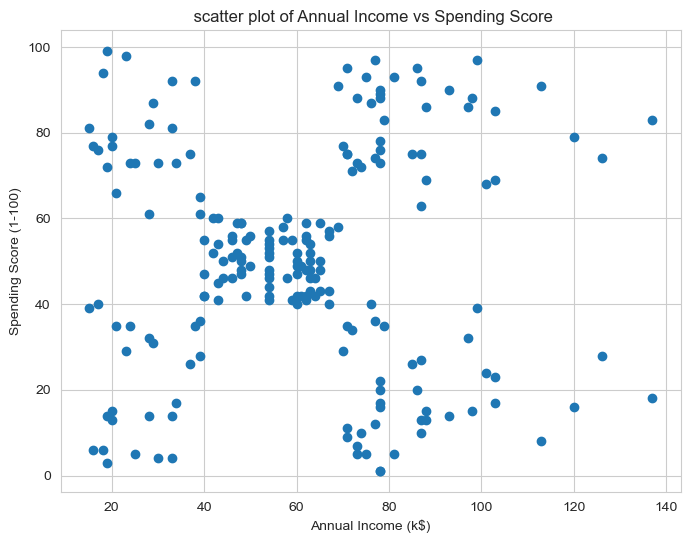

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(New_df['Annual Income (k$)'], New_df['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title(" scatter plot of Annual Income vs Spending Score")
plt.show()

<Axes: >

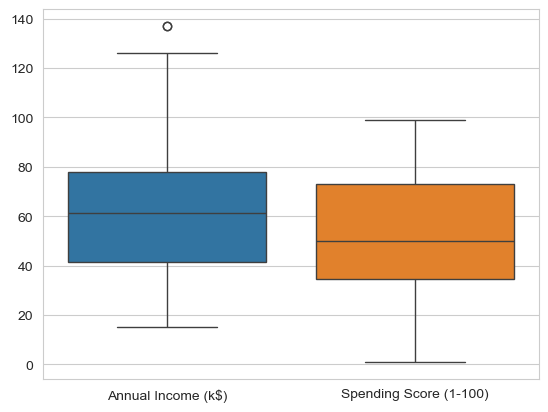

In [9]:
sns.boxplot(New_df)

In [10]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(New_df)

print("Original Data Shape:-",New_df.shape)
print("Scaled Data Shape:-",scaled_df.shape)
print("\n Original Data Statistics :-")
print(pd.DataFrame(New_df).describe)
print("\n Scaled Data Statistics :-")
print(pd.DataFrame(scaled_df).describe)

Original Data Shape:- (200, 2)
Scaled Data Shape:- (200, 2)

 Original Data Statistics :-
<bound method NDFrame.describe of      Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]>

 Scaled Data Statistics :-
<bound method NDFrame.describe of             0         1
0   -1.738999 -0.434801
1   -1.738999  1.195704
2   -1.700830 -1.715913
3   -1.700830  1.040418
4   -1.662660 -0.395980
..        ...       ...
195  2.268791  1.118061
196  2.497807 -0.8618

# Part 2: K-Means Clustering 

###  Finding the Optimal Number of Clusters (k)

  File "c:\Users\urvik\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\urvik\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\urvik\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\urvik\anaconda3\Lib\subprocess.

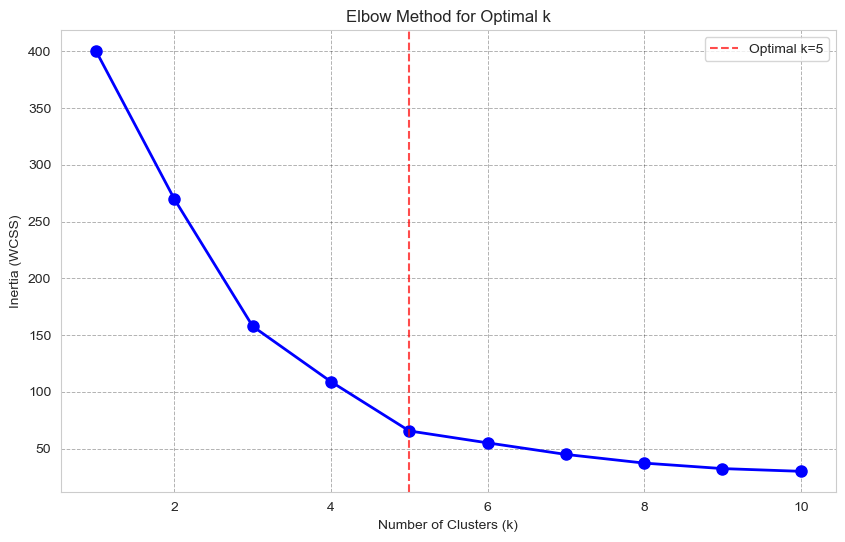

In [11]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(scaled_df)
    inertias.append(kmeans_temp.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True , alpha=0.3 , linestyle='--' , linewidth=0.7 , color='black' , which='both' , axis='both')
plt.axvline(x = 5,color='red', linestyle='--', alpha=0.7, label='Optimal k=5')
plt.legend()
plt.show()

###  Applying K-Means

In [12]:
kmeans = KMeans(n_clusters=5,random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(scaled_df)

print("K-Means Clustering Centers :-")
print(kmeans.cluster_centers_)

print("\nCluster Assignments :-")
print(np.bincount(kmeans_labels))

print("Labels Assigned to each data point :-" , kmeans_labels)

print(f'\n Inertia (WCSS): {kmeans.inertia_:.2f}')

K-Means Clustering Centers :-
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Cluster Assignments :-
[81 39 22 35 23]
Labels Assigned to each data point :- [4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]

 Inertia (WCSS): 65.57


###  Visualize K-Means Results

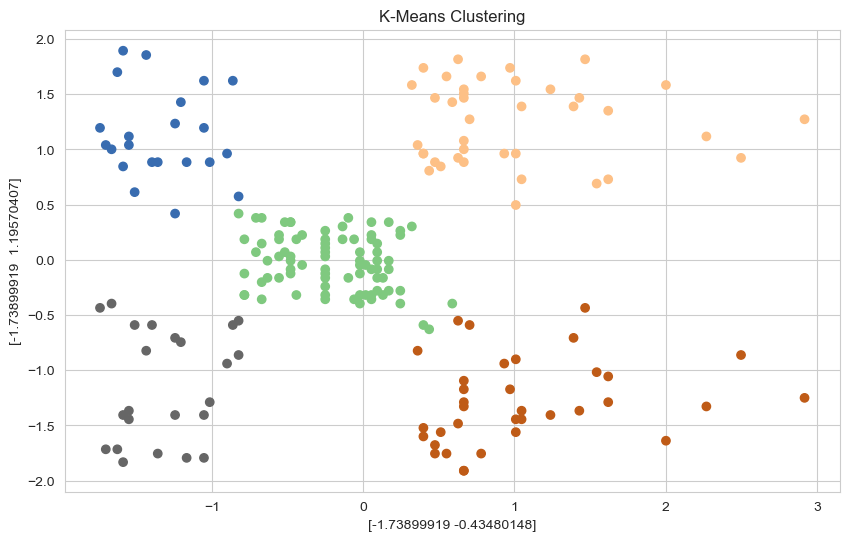

In [13]:
plt.figure(figsize=(10, 6))
scatter2 = plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=kmeans_labels, cmap='Accent')
plt.xlabel(scaled_df[0])
plt.ylabel(scaled_df[1])
plt.title('K-Means Clustering')
plt.show()

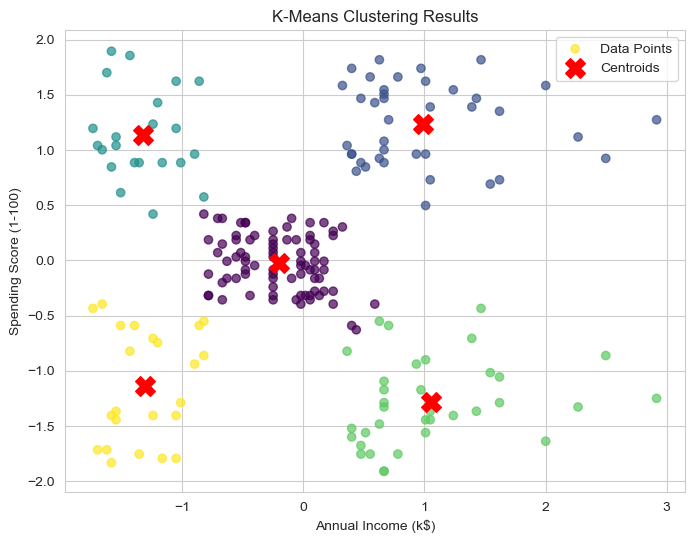

In [14]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    scaled_df[:, 0], scaled_df[:, 1],
    c=kmeans_labels, cmap='viridis', alpha=0.7, label='Data Points'
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c='red', marker='X', s=200, label='Centroids'
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

# Part 3: Agglomerative Hierarchical Clustering 

### Creating a Dendrogram

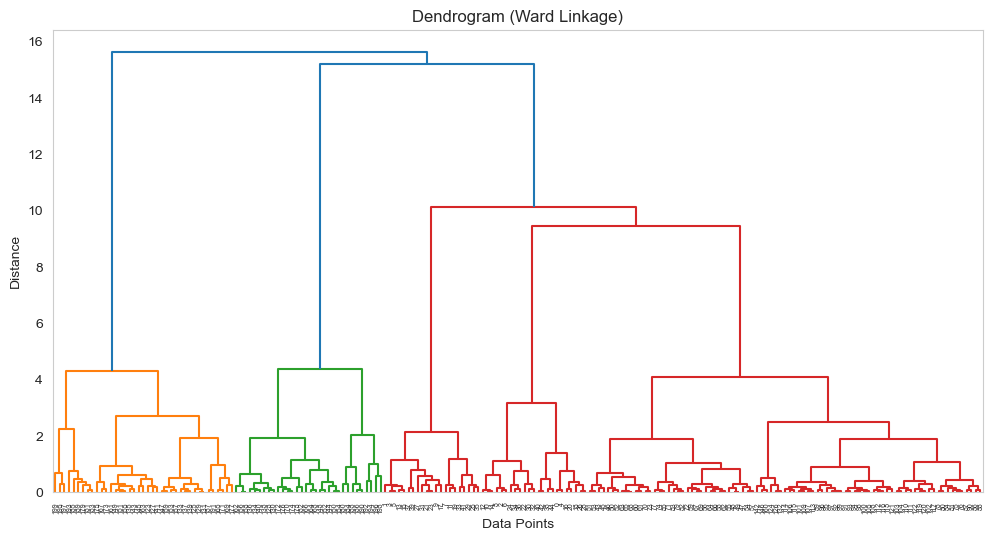

In [15]:
plt.figure(figsize=(12,6))
linked = linkage(scaled_df, method='ward')
dendrogram(linked)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(False)
plt.show()

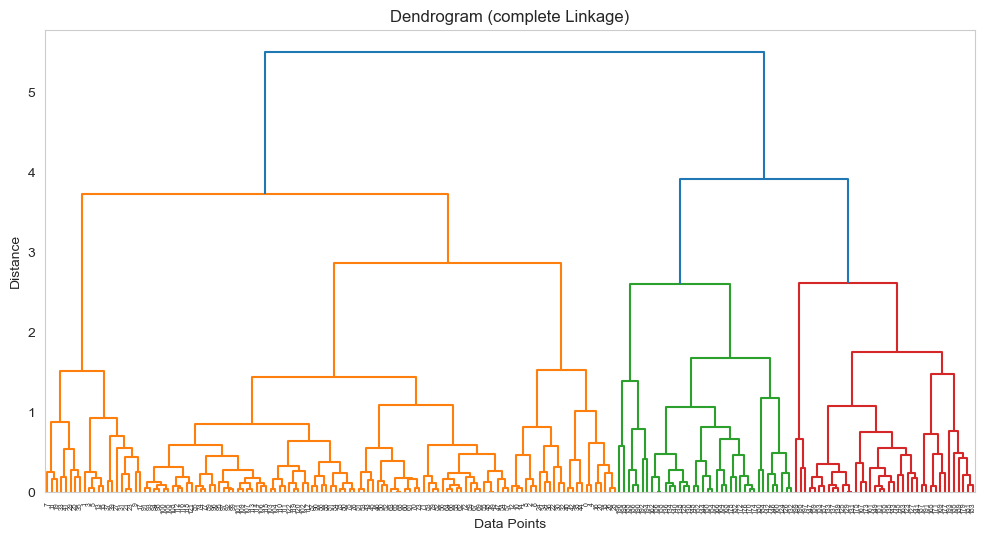

In [16]:
plt.figure(figsize=(12,6))
linked = linkage(scaled_df, method='complete')
dendrogram(linked)
plt.title("Dendrogram (complete Linkage)")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(False)
plt.show()

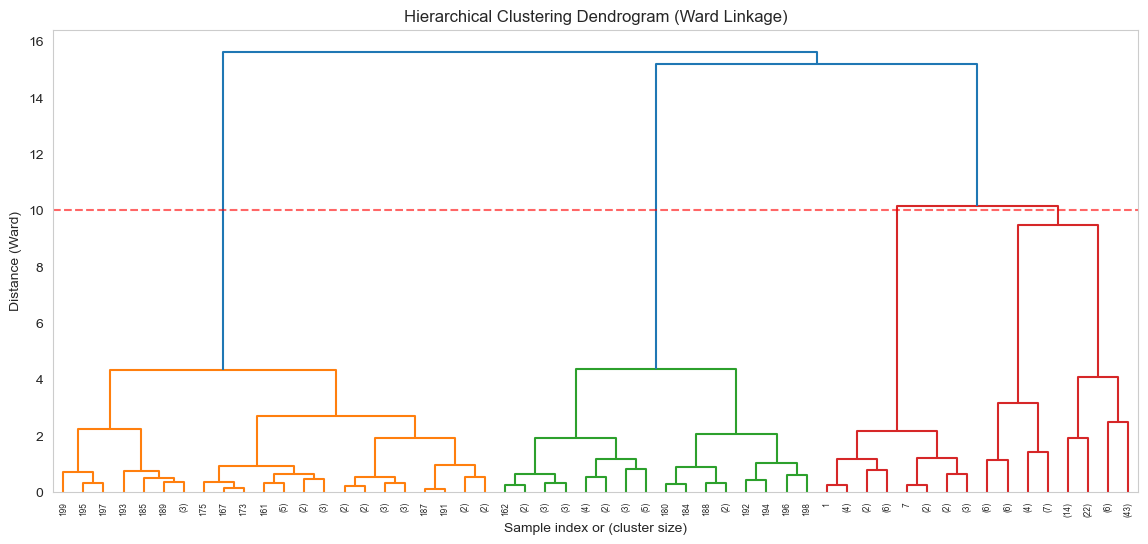

In [17]:
Z = linkage(scaled_df, method='ward')
plt.figure(figsize=(14, 6))
dendrogram(Z, truncate_mode='level', p=5, color_threshold=None)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance (Ward)')
plt.grid(False)
plt.axhline(y=10, color='r', linestyle='--', alpha=0.6)  
plt.show()


###  Applying Hierarchical Clustering

In [18]:
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglo_labels = agglo.fit_predict(scaled_df)

###  Visualize Hierarchical Clustering Results

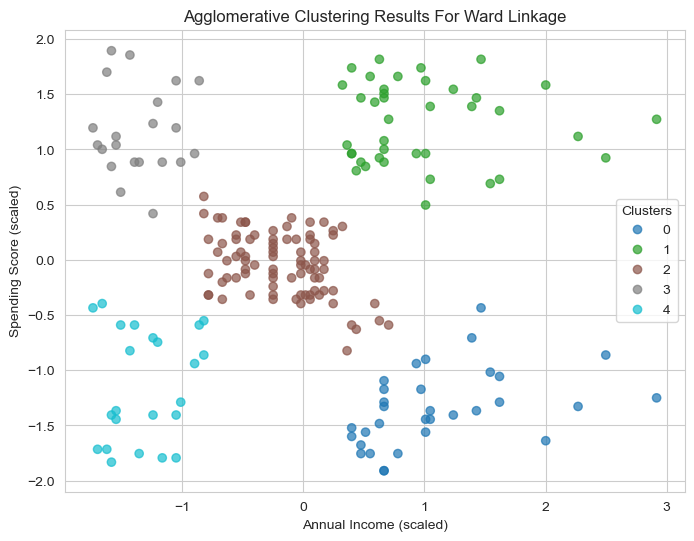

In [19]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    scaled_df[:, 0], scaled_df[:, 1],
    c=agglo_labels, cmap='tab10', alpha=0.7, label='Data Points'
)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Agglomerative Clustering Results For Ward Linkage')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# Part 4: DBSCAN Clustering 

###  Applying DBSCAN

In [20]:
dbscan = DBSCAN(eps=0.367, min_samples=4)
dbscan_labels = dbscan.fit_predict(scaled_df)

print("DBSCAN Clustering Assignments :-")
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        print(f"Noise points: {np.sum(dbscan_labels == label)}")
    else:
        print(f"Cluster {label}: {np.sum(dbscan_labels == label)} points")

print(f"\nNumber of clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Number of noise points: {np.sum(dbscan_labels == -1)}")

DBSCAN Clustering Assignments :-
Noise points: 15
Cluster 0: 113 points
Cluster 1: 12 points
Cluster 2: 33 points
Cluster 3: 27 points

Number of clusters: 4
Number of noise points: 15


###  Visualize DBSCAN Results

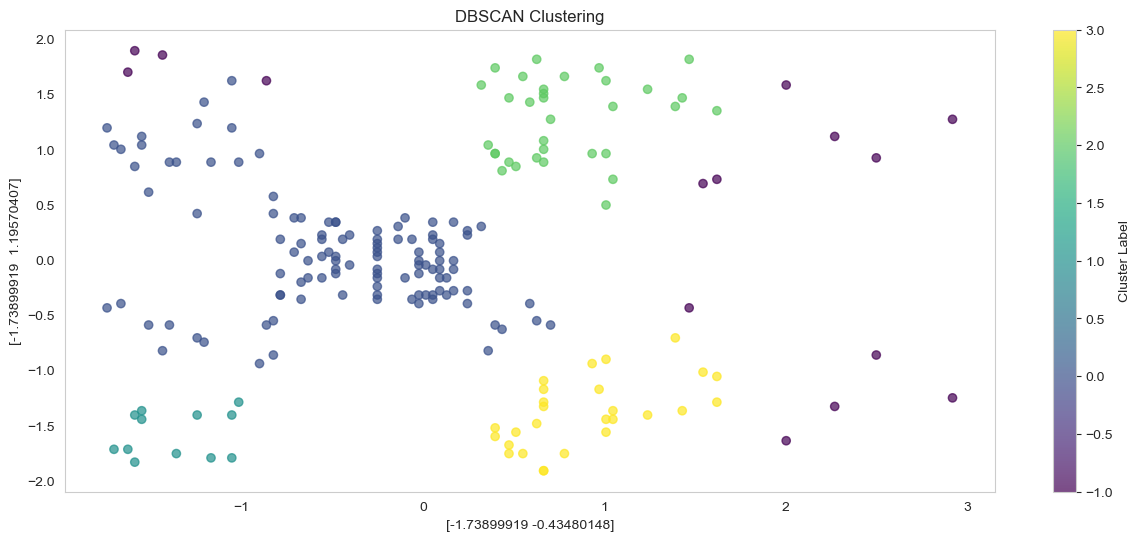

In [21]:
plt.figure(figsize=(15, 6))
scatter2 = plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.xlabel(scaled_df[0])
plt.ylabel(scaled_df[1])
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.grid(False)
plt.show()

In [22]:

def print_clustering_scores(input, labels, name="Clustering"):
    mask = labels != -1 if -1 in labels else np.ones_like(labels, dtype=bool)
    n_clusters = len(set(labels[mask]))
    print(f"\n{name} Evaluation:")
    if n_clusters > 1:
        sil = silhouette_score(input[mask], labels[mask])
        print(f"Silhouette Score: {sil:.3f}")
    else:
        print("Silhouette Score: Not defined (only one cluster or all noise)")


print_clustering_scores(scaled_df, kmeans_labels, name="K-Means")

print_clustering_scores(scaled_df, agglo_labels, name="Agglomerative (Ward)")

print_clustering_scores(scaled_df, dbscan_labels, name="DBSCAN")


K-Means Evaluation:
Silhouette Score: 0.555

Agglomerative (Ward) Evaluation:
Silhouette Score: 0.554

DBSCAN Evaluation:
Silhouette Score: 0.488
